In [489]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [490]:
# a form of summary of the data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and 

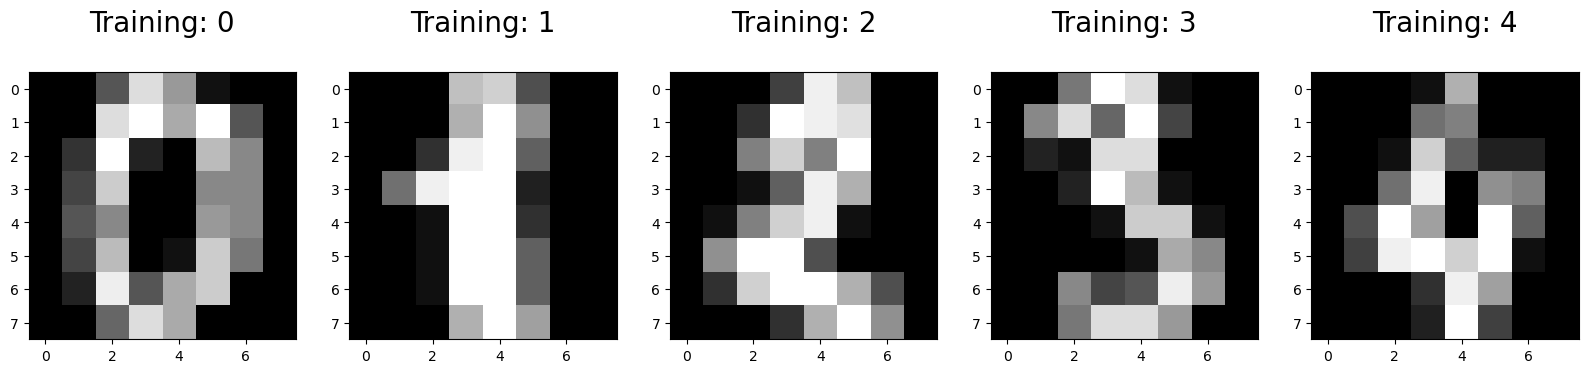

In [491]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [492]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print(X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [493]:
# 3.2 batch gradient descent (GD) for Logistic regression
def LogisticRegression_GD(X_train, y_train, learning_rate):
    loss = []
    dataset_size, data_attributes = X_train.shape
    print("Dataset Size : ", dataset_size)
    epsilon = 1.0*np.exp(-4)
    eta = 0.1
    c = 10
    W = np.random.normal(0, 1, (data_attributes*c))
    b = np.zeros(c)
    W.resize(data_attributes, c)
    while 1 :
        Z = np.matmul(X_train, W)
        for i in range(dataset_size):
            Z[i] = Z[i] + b
        k=0
        for i in range(dataset_size):
            for j in range(c):
                if(Z[i][j] > k) :
                    k = Z[i][j]
        Z = Z - k*np.ones(Z.shape)
        Z = np.exp(Z)
        Z_sum = np.sum(Z, axis = 1)
        for i in range(dataset_size):
            for j in range(c):
                Z[i][j] = Z[i][j]/Z_sum[i]
        Zlog = -np.log(Z)
        F = Zlog.sum()
        F = F/dataset_size
        W_2 = W**2
        W_2_reg = eta*W_2.sum()/2
        F = F + W_2_reg
        loss.append(F)
        if len(loss) >= 2 :
            if np.abs(loss[-1] - loss[-2]) < epsilon :
                break
        #Gradient Descent Stuff
        gradient_desc_sum = 0;
        for i in range(dataset_size):
            error = np.zeros(c)
            for j in range(c):
                if(y_train[i] == j+1):
                    error[j] = (1 - Z[i][j])
                else :
                    error[j] = (-Z[i][j])
            temp = np.zeros((data_attributes, c))
            for j in range(data_attributes):
                for k in range(c):
                    temp[j][k] = X_train[i][j]*error[k]
            W = W + (learning_rate*temp/dataset_size)
        W = W - (learning_rate*eta*W)
    return W, b, np.array(loss)

---------------------------------------
learning rate = 0.05
Dataset Size :  1347
Final Loss Value :  174.10307939002357
training precision = 80.69784706755753
test precision = 78.88888888888889
---------------------------------------
learning rate = 0.005
Dataset Size :  1347
Final Loss Value :  88.26890279017098
training precision = 88.2702301410542
test precision = 86.22222222222223
---------------------------------------
learning rate = 0.01
Dataset Size :  1347
Final Loss Value :  81.93692451199382
training precision = 88.71566443949519
test precision = 86.66666666666667


Text(0, 0.5, 'loss')

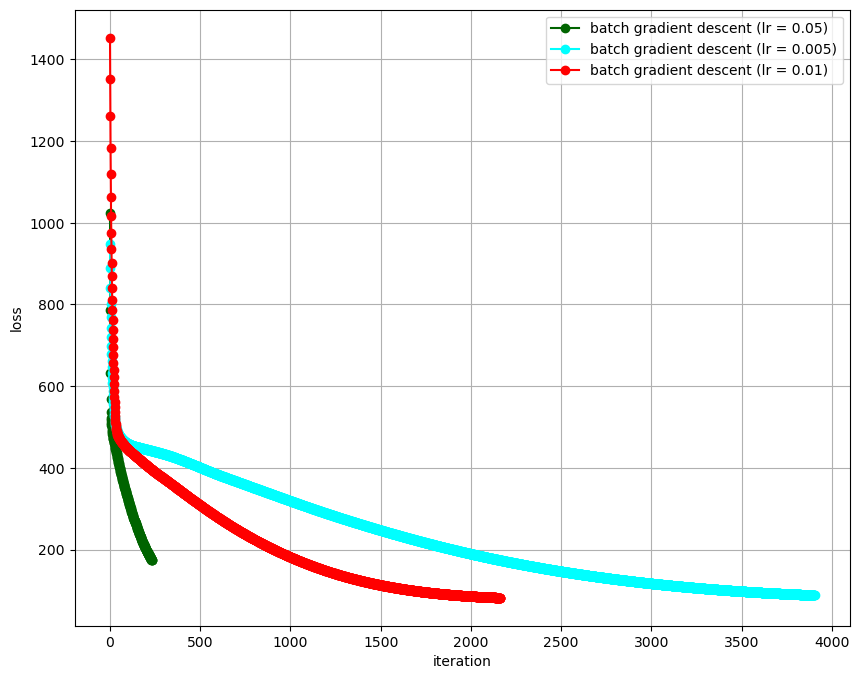

In [495]:
def calculate_precision(Y, W, X):
    Z = np.matmul(X, W)
    Z = np.exp(Z)
    c = 10
    dataset_size, data_attributes = X.shape
    Z_sum = np.sum(Z, axis = 1)
    for i in range(dataset_size):
            for j in range(c):
                Z[i][j] = Z[i][j]/Z_sum[i]
    argmax = np.argmax(Z, axis = 1)

    correct_predictions = 0
    for i in range(dataset_size):
        if Y[i] == (argmax[i] + 1):
            correct_predictions += 1
    precision = (correct_predictions/dataset_size)*100
    return precision
    
# evaluation of different learning rate
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(learning_rate)):
    
    print('---------------------------------------')
    print('learning rate =', learning_rate[i])
    
    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])

    print("Final Loss Value : ", loss_GD[-1])
    prec_train = calculate_precision(y_train, W, X_train)
    print('training precision =', prec_train)

    prec_test = calculate_precision(y_test, W, X_test)
    print('test precision =', prec_test)
    
    plt.plot(loss_GD, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [509]:
# 3.3 stochastic gradient descent (SGD) for Logistic regression

def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):
    
    loss = []
    dataset_size, data_attributes = X_train.shape
    print("Dataset Size : ", dataset_size)
    epsilon = 1.0*np.exp(-4)
    eta = 0.1
    c = 10
    notstop = True
    W = np.random.normal(0, 1, (data_attributes*c))
    b = np.zeros(c)
    W.resize(data_attributes, c) 
    batch_starting_point = 0
    epoch = 0
    # optimization loop	
    while notstop and epoch < max_epoch:
        batch_ending_point = 0
        if batch_starting_point + batch_size <= dataset_size:
            batch_starting_point = 0
        
        Z = np.matmul(X[batch_starting_point:batch_starting_point+100], W)
        batch_starting_point = batch_starting_point+100
        for i in range(batch_size):
            Z[i] = Z[i] + b
        k=0
        for i in range(batch_size):
            for j in range(c):
                if(Z[i][j] > k) :
                    k = Z[i][j]
        Z = Z - k*np.ones(Z.shape)
        Z = np.exp(Z)
        Z_sum = np.sum(Z, axis = 1)
        for i in range(batch_size):
            for j in range(c):
                Z[i][j] = Z[i][j]/Z_sum[i]
        Zlog = -np.log(Z)
        F = Zlog.sum()
        F = F/batch_size
        W_2 = W**2
        W_2_reg = eta*W_2.sum()/2
        F = F + W_2_reg
        loss.append(F)
        if len(loss) >= 2 :
            if np.abs(loss[-1] - loss[-2]) < epsilon :
                break
        
        # half lr if not improving in 10 epochs
        if epoch > 10:
            if loss[epoch - 10] <= loss[epoch] - eps:
                lr *= 0.5
                print('reduce learning rate to', lr)
        
        # stop if not improving in 20 epochs
        if epoch > 20:
            if loss[epoch - 20] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch-1]) <= eps:                
                notstop = False
                break

        #Gradient Descent Stuff
        gradient_desc_sum = 0;
        for i in range(batch_size):
            error = np.zeros(c)
            for j in range(c):
                if(y_train[i] == j+1):
                    error[j] = (1 - Z[i][j])
                else :
                    error[j] = (-Z[i][j])
            temp = np.zeros((data_attributes, c))
            for j in range(data_attributes):
                for k in range(c):
                    temp[j][k] = X_train[i][j]*error[k]
            W = W + (lr*temp/batch_size)
        W = W - (lr*eta*W) 
        epoch += 1

    return (W, b, np.array(loss))

---------------------------------------
batch_size = 10
Dataset Size :  1347
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
reduce learning rate to 7.8125e-05
reduce learning rate to 3.90625e-05
Final Loss Value :  6775.26035476595
training precision = 13.21455085374907
test precision = 15.777777777777777
---------------------------------------
batch_size = 50
Dataset Size :  1347
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
reduce learning rate to 7.8125e-05
reduce learning rate to 3.90625e-05
Final Loss Value :  1290.2466192487811
training precision = 27.171492204899778
test precision = 23.333333333333332
---------------------------------------
batch_size = 100
Dataset Size :  1347
Final Los

Text(0, 0.5, 'loss')

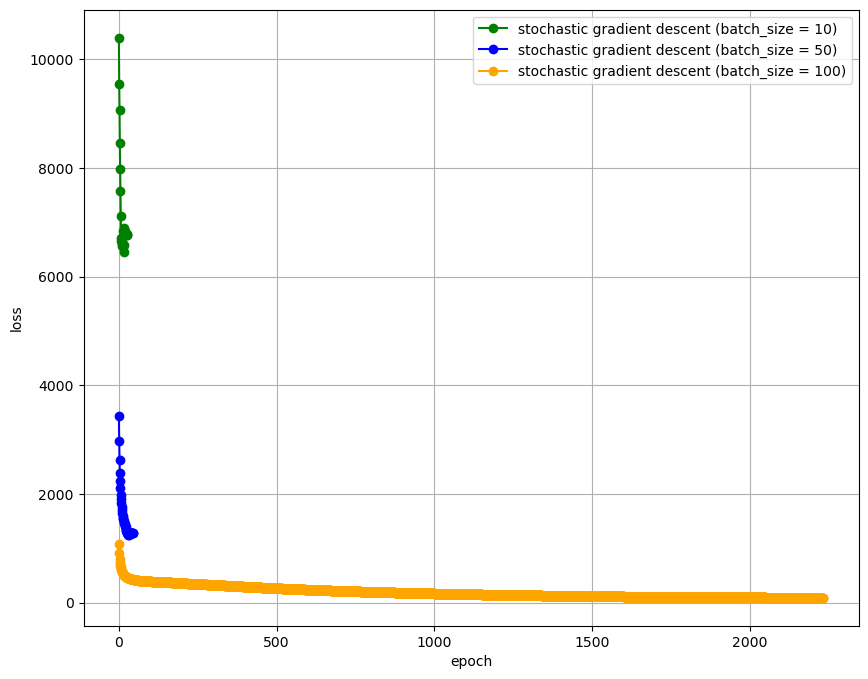

In [527]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# Standard Learning Rate
lr = [1.0e-2, 1.0e-2, 1.0e-2]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    
    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 2500)
    
    print("Final Loss Value : ", loss_SGD[-1])
    prec_train = calculate_precision(y_train, W, X_train)
    print('training precision =', prec_train)

    prec_test = calculate_precision(y_test, W, X_test)
    print('test precision =', prec_test)
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

---------------------------------------
batch_size = 10
Dataset Size :  1347
reduce learning rate to 0.15
reduce learning rate to 0.075
Final Loss Value :  23823.882027049494
training precision = 32.44246473645137
test precision = 35.55555555555556
---------------------------------------
batch_size = 50
Dataset Size :  1347


/var/folders/c9/3q_3q36n4k9_t4gnwrhyd7s80000gn/T/ipykernel_72269/3995326649.py:38: RuntimeWarning: divide by zero encountered in log
  Zlog = -np.log(Z)


reduce learning rate to 0.15
reduce learning rate to 0.075
reduce learning rate to 0.0375
reduce learning rate to 0.01875
reduce learning rate to 0.009375
reduce learning rate to 0.0046875
reduce learning rate to 0.00234375
reduce learning rate to 0.001171875
reduce learning rate to 0.0005859375
reduce learning rate to 0.00029296875
reduce learning rate to 0.000146484375
Final Loss Value :  2185.15948244421
training precision = 70.2301410541945
test precision = 70.0
---------------------------------------
batch_size = 100
Dataset Size :  1347
Final Loss Value :  91.29047788240926
training precision = 73.57089829250185
test precision = 72.0


Text(0, 0.5, 'loss')

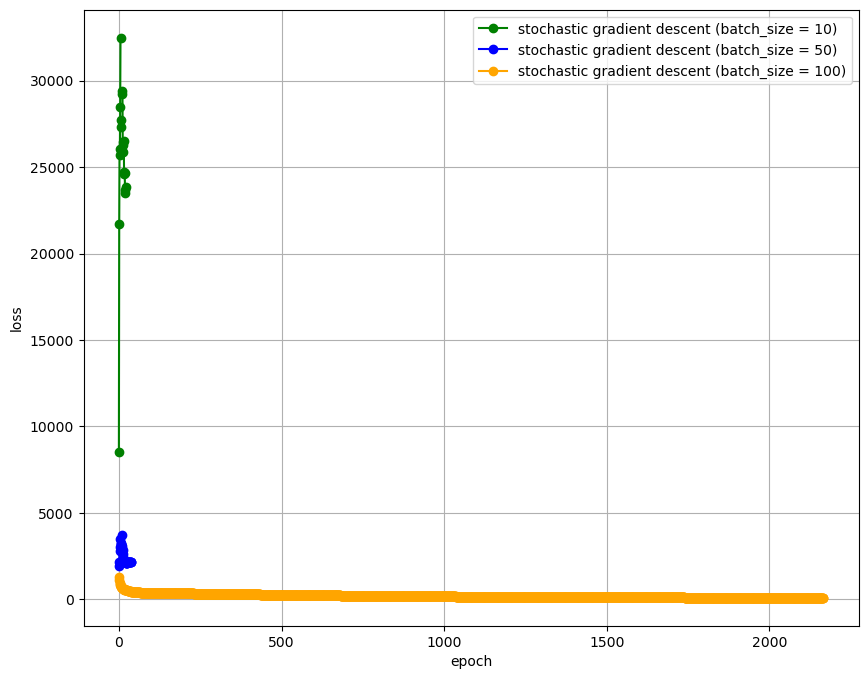

In [546]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# Experimented Learning Rates
lr = [3.0e-1, 3.0e-1, 1.0e-2]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    
    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 2500)
    
    print("Final Loss Value : ", loss_SGD[-1])
    prec_train = calculate_precision(y_train, W, X_train)
    print('training precision =', prec_train)

    prec_test = calculate_precision(y_test, W,  X_test)
    print('test precision =', prec_test)
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss') 